# Several Decision Boundaries Demonstration

This notebook demonstrates several decision boundaries generated with normal random noise for a logistic regression model.

## Import Required Libraries

Import the necessary libraries including numpy, matplotlib, and scikit-learn.

In [1]:
# Import the required libraries.
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

## Generate Sample Data

Generate random data for two classes using normal distributions.

In [2]:
# Set random seed for reproducibility.
np.random.seed(42)

# Generate data for two classes.
N_POINTS = 20
x_red = np.random.normal(loc=1, scale=0.75, size=(N_POINTS, 2))
x_blue = np.random.normal(loc=4, scale=0.75, size=(N_POINTS, 2))

## Create and Train Logistic Regression Model

Combine the data and fit a logistic regression model.

In [3]:
# Combine the data.
X = np.vstack((x_red, x_blue))
y = np.hstack((np.zeros(N_POINTS), np.ones(N_POINTS)))

# Fit multiple linear classifiers with different random states.
colors = [ "#2580B7", "#179E86", "#9EBE5B", "#F59B11", "#C03B26", "#633248" ]
clf = LogisticRegression()
clf.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Plot Decision Boundaries

Create a visualization showing multiple decision boundaries with different noise variations.

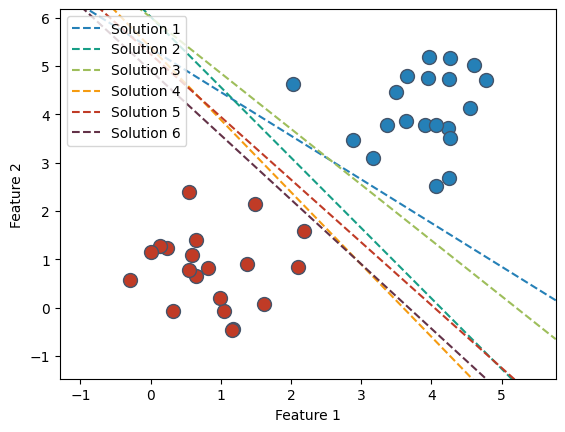

In [4]:
# Create figure and axis
fig, ax = plt.subplots()

# Plot red class points
ax.scatter(
    x_red[:, 0], x_red[:, 1], color="#C03B26", s=100, edgecolor="#44546A")

# Plot blue class points
ax.scatter(
    x_blue[:, 0], x_blue[:, 1], color="#2580B7", s=100, edgecolor="#44546A")

# Plot the decision boundaries.
for i, color in enumerate(colors):

    # Get the coefficients of the decision boundary and add some noise.
    coef = clf.coef_[0]
    coef[0] += np.random.normal(0, 0.5)
    intercept = clf.intercept_ + np.random.normal(-1.1, 1)

    # Plot the current decision boundary.
    x_values = np.linspace(x_red[:, 0].min() - 1, x_blue[:, 0].max() + 1, 100)
    y_values = -(coef[0] * x_values + intercept) / coef[1]
    ax.plot(
        x_values, y_values, color=color,
        linestyle="--", label=f"Solution {i + 1}"
    )

# Add legend to the plot.
ax.legend(loc="upper left")

# Customize plot appearance to match the style.
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_xlim(x_red[:, 0].min() - 1, x_blue[:, 0].max() + 1)
ax.set_ylim(x_red[:, 1].min() - 1, x_blue[:, 1].max() + 1)

# Show plot.
plt.show()